In [1]:
%config InlineBackend.figure_format = 'retina'
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from hmr import Reloader
import heatgraphy as hg
hg = Reloader(hg)

In [2]:
onco = pd.read_csv("data/PATIENT_DATA_oncoprint.tsv", sep="\t")
onco = onco.iloc[:, range(20)]
mut_events = ['CNA', 'MUTATIONS', 'MRNA', 'PROTEIN', 'STRUCTURAL_VARIANT']

# Fix broken names
# onco.replace('amp_rec', 'Amplification', inplace=True)
# onco.replace('homdel_rec', 'Deep Deletion', inplace=True)
# onco.replace('splice', 'Splice Mutation (putative driver)', inplace=True)
# onco.replace('splice_rec', 'Splice Mutation (putative passenger)', inplace=True)
# onco.replace('sv', 'Structural Variant (putative driver)', inplace=True)
# onco.replace('sv_rec', 'Structural Variant (putative passenger)', inplace=True)

onco_events = onco[onco['track_type'].isin(mut_events)].set_index(['track_name', 'track_type'])
onco_exp = onco[~onco['track_type'].isin(mut_events)].set_index(['track_name', 'track_type'])

In [3]:
import oncoprinter as oc
oc = Reloader(oc)

In [4]:
onco_test = onco_events.melt(ignore_index=False).dropna().reset_index()
onco_test.columns = ['track_name', 'track_type', 'Patient', 'Event']

In [5]:
d = onco_test[['Patient', 'track_name', 'Event']]

In [6]:
exp = np.random.rand(4, 18)

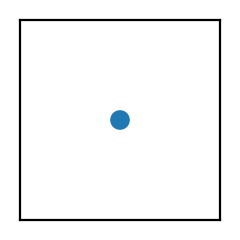

In [69]:
hg.layers.preview(hg.layers.Marker("o", size=50), figsize=(1, 1))

In [32]:
from matplotlib.patches import Circle
from matplotlib.transforms import IdentityTransform
from matplotlib.markers import MarkerStyle
from matplotlib.collections import PathCollection

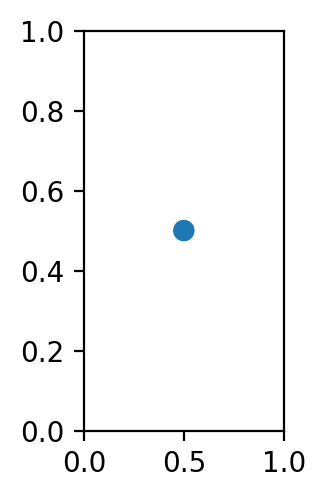

In [60]:
m = MarkerStyle("o")
path = m.get_path().transformed(
    m.get_transform())
figure = plt.figure(figsize=(1, 2))
ax = figure.add_axes([0, 0, 1, 1])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

collection = PathCollection(
    (path,), [60],
    offsets=[[.5, .5]],
    offset_transform=ax.transData,
)
collection.set_transform(IdentityTransform())
ax.add_artist(collection)

In [61]:
ax.transData

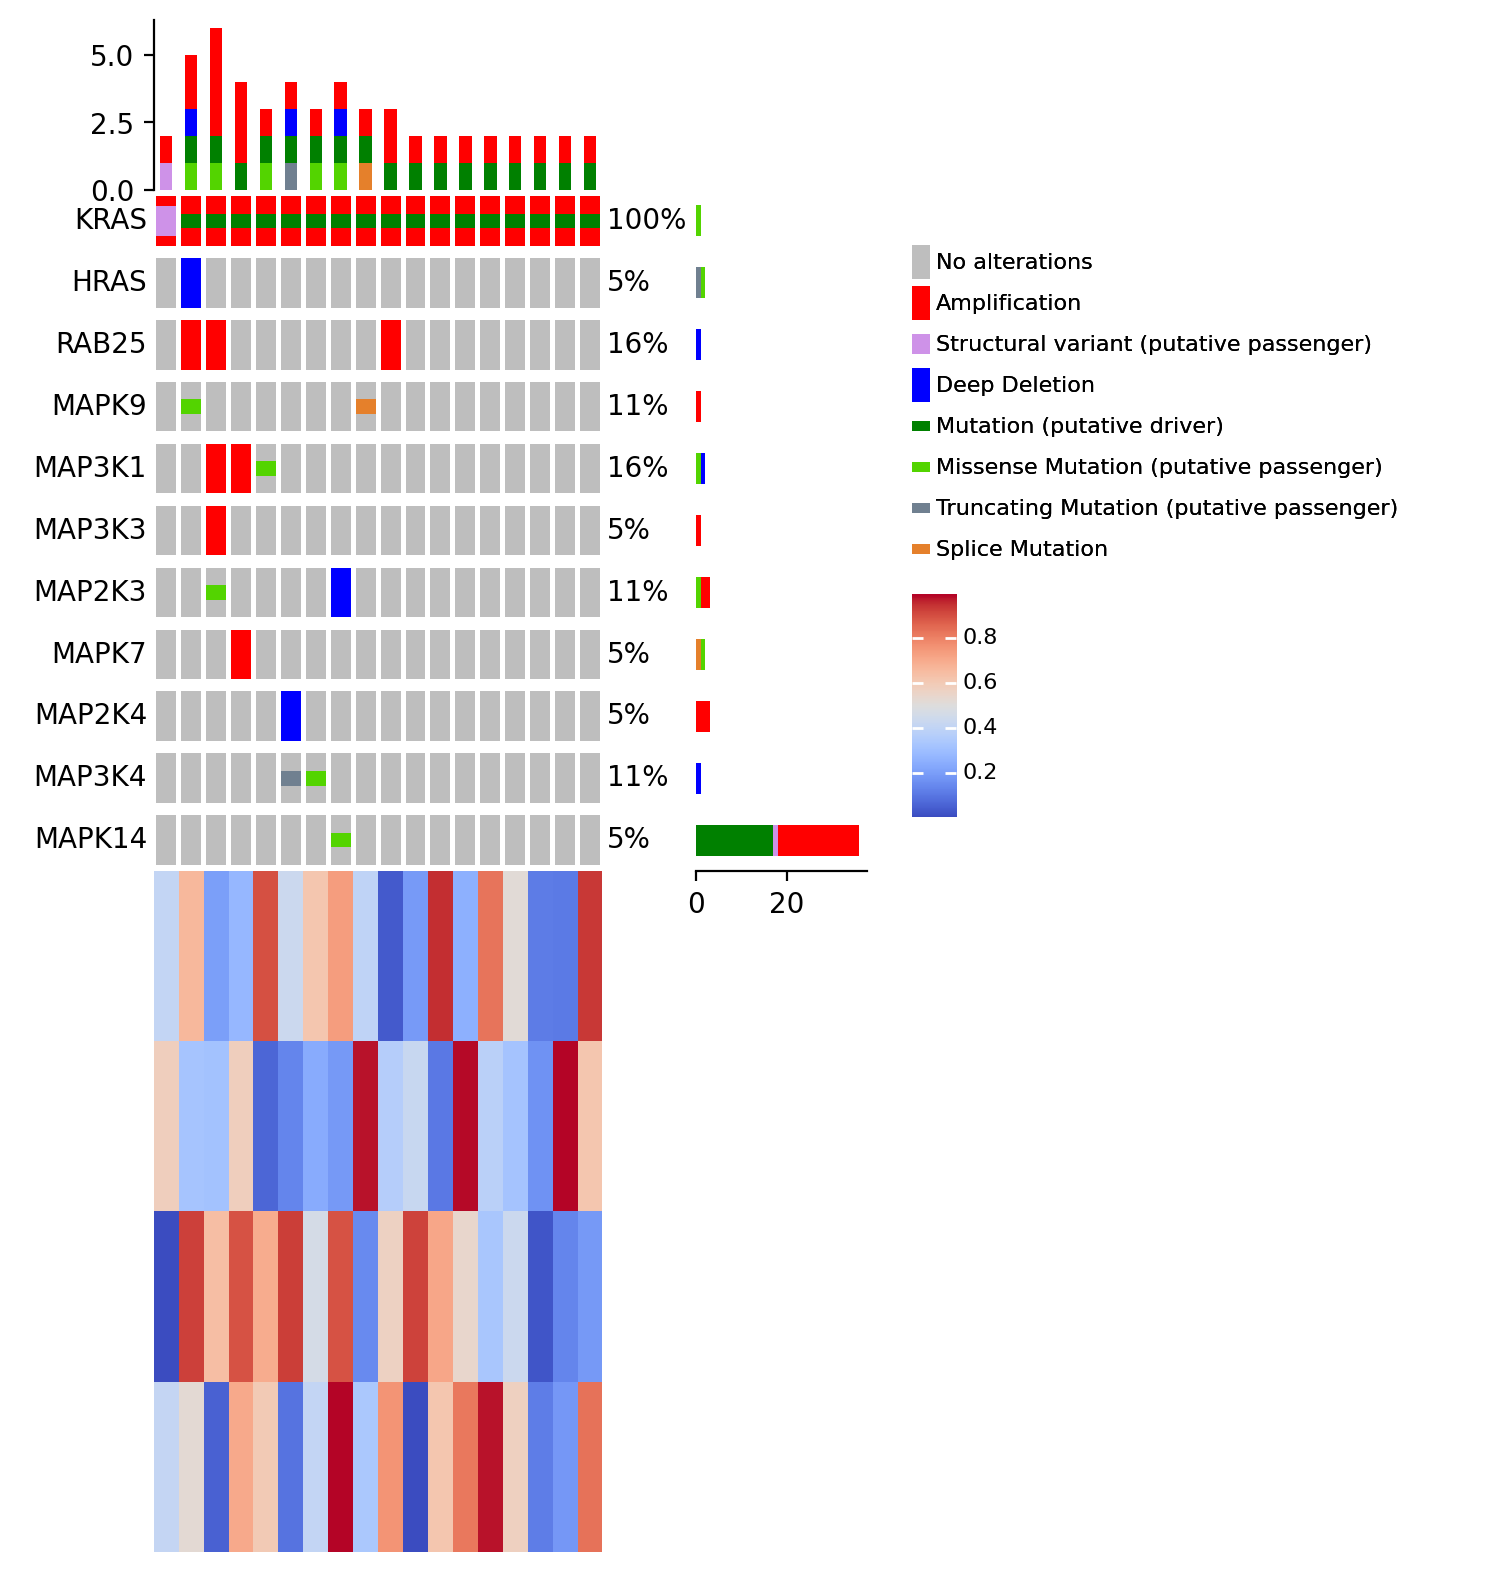

In [21]:
op = oc.OncoPrint(d)
op.append_expression(exp)

op.render()

In [32]:
np.linspace(start=0, stop=1, num=4+2)[1:-1]

array([0.2, 0.4, 0.6, 0.8])